# Keşifsel Veri Analizi (EDA) 

Keşifsel Veri Analizi veriyle ilgili yapılan tüm çalışmalarda her zaman olması gereken bir ön aşamadır. Doğru business kararlarını alabilmek, iyi modeller üretebilmek öncesinde yapılan detaylı bir EDA çalışmasına bağlıdır. 

Peki nedir bunun aşamaları?

1) **Hangi verilere ihtiyacınız olduğunu belirleyin**

2) **Verilerinizi toplayın ve yükleyin**

3) **Veri tiplerinizi kontrol edin**

4) **Veri setiniz hakkında genel bilgiler toplayın**

5) **Tekrar eden verileri kaldırın**

6) **Sütunlardaki değerleri gözden geçirin**

7) **Verilerinizin dağılımını inceleyin**

8) **Boş değerleri tespit edin ve gerekli düzenlemeleri yapın**

9) **Daha detaylı analizler için verilerinizi filtreleyin**

10) **Görsellerden yararlanarak analizinizi daha da derinleştirin**

11) **Sonuçlarınızı sunmak için kullanacağınız görselleri hazırlayın**

## Veri Setini Tanıyalım 

1896 Atina Olimpiyatları'ndan 2016 Rio Olimpiyatları'na kadar uzanan ve oyunların kayıtlarına sahip olan Olimpiyat Oyunlarının kapsamlı bir veri kümesidir.

Her örnek, bireysel bir Olimpik etkinlikte (sporcu etkinlikleri) yarışan bireysel bir sporcuya karşılık gelir. Kullanılan veri setinin metadatası için: [Metadata](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

In [1]:
# İlk işimiz kütüphanelerimizi çağırmak :) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("athlete_events.csv", index_col=1).drop(columns=["Unnamed: 0"])
df1

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,?,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,?,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,?,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 1 to 135568
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    222552 non-null  object 
 1   Sex     222552 non-null  object 
 2   Age     213363 non-null  float64
 3   Height  170695 non-null  float64
 4   Weight  222552 non-null  object 
 5   Team    222552 non-null  object 
 6   NOC     222552 non-null  object 
 7   Games   222552 non-null  object 
 8   Year    222552 non-null  int64  
 9   Season  222552 non-null  object 
 10  City    222552 non-null  object 
 11  Sport   222552 non-null  object 
 12  Event   222552 non-null  object 
 13  Medal   34088 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 25.5+ MB


>**SORU:** Weight sütununun float dönmesini beklemiştik ama neden object olarak gelmiş?

İlerleyen satırlarda bu durumu inceleyelim...

In [4]:
df2 = pd.read_csv("noc_regions.csv")
df2

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


Veri setlerini birleştirmek için `pandas.merge()` fonksiyonunu kullanabiliriz.

In [6]:
df = pd.merge(df1, df2, on='NOC')
df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
222199,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
222200,M'apotlaki Ts'elho,F,15.0,NaN,?,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
222201,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


Bu projemizin odak noktası **yalnızca yaz olimpiyatları** olacağı için, veri kümemizden tüm kış olimpiyatlarını filtreleyelim ve veri kümemiz üzerinde bazı temel analizler yapalım.

In [7]:
df = df[df["Season"]=="Summer"]
df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
222199,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
222200,M'apotlaki Ts'elho,F,15.0,NaN,?,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
222201,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


Öncelikle boş değerlerimize bakalım.

In [8]:
df.isnull().sum()

Name           0
Sex            0
Age         9177
Height     51769
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188124
region        21
notes     217802
dtype: int64

Her spor dalı için yalnızca üç kazanan olabileceği gerçeğinden dolayı madalya sütunun birçok NAN değerine sahip olduğuna inanıyorum. Ancak, yüzlerce katılımcı bu üç yer için yer almakta ve yarışmaktadır.

In [9]:
df.Medal.value_counts(normalize=True) # Değerlerin yüzdesine bakalım

Gold      0.336219
Bronze    0.334664
Silver    0.329118
Name: Medal, dtype: float64

In [10]:
missing_percentage = 100 * (df.isna().sum().sort_values(ascending=False) / len(df))
missing_percentage

notes     98.019379
Medal     84.663123
Height    23.298065
Age        4.130007
region     0.009451
Name       0.000000
Sex        0.000000
Weight     0.000000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
dtype: float64

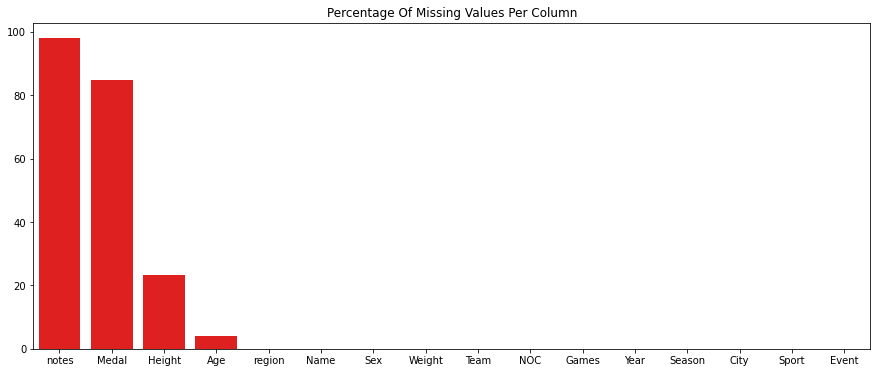

In [11]:
plt.figure(figsize=(15,6))
plt.title("Percentage Of Missing Values Per Column")
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='Red');

Görseller oluştururken ihtiyacımız olmayan bilgileri görselimizde bulundurmanın bizim için hiçbir yararı yok. Sebep olacağı tek şey karmaşıklık!

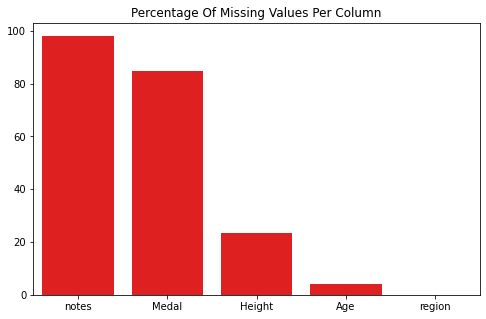

In [12]:
plt.figure(figsize=(8,5))
plt.title("Percentage Of Missing Values Per Column")
sns.barplot(x=missing_percentage[:5].index, y=missing_percentage[:5].values, color='Red');

**Notes** sütunun bu EDA projemiz için bir faydası olmayacağını düşündüğümüz için kaldıralım.

In [13]:
df.drop(["notes"], axis=1, inplace=True)

**Weight** sütunumuzun veri tipinde bir sorun vardı, şimdi bu durumu daha detaylı inceleyelim...

In [14]:
df['Weight'].value_counts()

?        53764
70.0      7656
60.0      6370
75.0      6274
68.0      5787
         ...  
198.0        1
180.0        1
151.0        1
149.0        1
175.0        1
Name: Weight, Length: 220, dtype: int64

Aa ne bulduk... Peki ya bu durumu göremeseydik?

In [15]:
df['Weight'] = df['Weight'].astype(float)

ValueError: could not convert string to float: '?'

İlk aşamada boş değer yok gibi görünmesine rağmen "?" olarak girilen değerler var, o zaman bunları da boş değer olarak değiştirmemiz lazım.

In [16]:
df['Weight'] = df['Weight'].replace('?', np.nan)  # "?" olarak girilmiş ifadeleri NaN olarak değiştirelim

In [17]:
df.isnull().sum()  #Tekrar kontrol edelim boş değer varlığını

Name           0
Sex            0
Age         9177
Height     51769
Weight     53764
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188124
region        21
dtype: int64

**Age**, **Height** ve **Weight** sütunlarındaki tüm boş değerleri aritmetik ortalamayla dolduralım:

In [18]:
df['Age'].fillna(value = df['Age'].mean(), inplace=True)
df['Height'].fillna(value = df['Height'].mean(), inplace=True)

In [19]:
df['Weight'].fillna(value = df['Weight'].mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

**Weight** sütunu için neden hata aldık beraber inceleyelim... 

In [ ]:
df['Weight'] = df['Weight'].astype(float) # İlk halinde "?" string olduğu için tüm sütunu string algılıyordu, şimdi float tipine çevirelim
df['Weight'].fillna(value = df['Weight'].mean(), inplace=True)  

In [ ]:
df.info()

Peki **region** sütunu içindeki boş değerleri ne yapabiliriz, birlikte düşünelim...

In [20]:
df["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Japan',
       'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco', 'Israel',
       'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia', 'Ivory Coast',
       'Kenya', 'Benin', 

In [21]:
df.region.dropna(inplace=True)  # Sadece 21 tane olduğu için kaldırmamız çok bir sorun yaratmaz

Yalnızca kendi etkinliklerinin galipleri bir Altın, Gümüş veya Bronz madalyaya sahip olacağından, veri setinde **Medal** sütunundaki tüm boş değerleri **Medal Not Won** olarak doldurabiliriz. 

In [22]:
df['Medal'].fillna(value = "Medal Not Won", inplace=True)

In [23]:
df.isnull().sum()

Name          0
Sex           0
Age           0
Height        0
Weight    53764
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region       21
dtype: int64

Peki tekrar eden değerler?

In [24]:
df[df.duplicated()]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
4643,Thyra Valborg Boldsen,F,48.0,175.522349,NaN,Denmark,DEN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",Medal Not Won,Denmark
4702,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,175.522349,NaN,Denmark,DEN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",Medal Not Won,Denmark
4703,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,175.522349,NaN,Denmark,DEN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",Medal Not Won,Denmark
4704,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,175.522349,NaN,Denmark,DEN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",Medal Not Won,Denmark
4705,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,175.522349,NaN,Denmark,DEN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",Medal Not Won,Denmark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209799,Konstantns Visotskis,M,68.0,175.522349,NaN,Latvia,LAT,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",Medal Not Won,Latvia
209800,Konstantns Visotskis,M,68.0,175.522349,NaN,Latvia,LAT,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",Medal Not Won,Latvia
209801,Konstantns Visotskis,M,68.0,175.522349,NaN,Latvia,LAT,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",Medal Not Won,Latvia
209802,Konstantns Visotskis,M,68.0,175.522349,NaN,Latvia,LAT,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",Medal Not Won,Latvia


In [25]:
df.duplicated().sum()

1385

In [26]:
df.drop_duplicates(inplace=True) #tekrar eden değerleri kaldıralım

In [27]:
df.duplicated().sum()

0

In [28]:
df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.000000,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Medal Not Won,China
1,A Lamusi,M,23.0,170.000000,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Medal Not Won,China
2,Abudoureheman,M,22.0,182.000000,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,Medal Not Won,China
3,Ai Linuer,M,25.0,160.000000,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",Medal Not Won,China
4,Ai Yanhan,F,14.0,168.000000,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,Medal Not Won,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,Mamorallo Tjoka,F,23.0,150.000000,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,Medal Not Won,Lesotho
222199,Mamorallo Tjoka,F,27.0,150.000000,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,Medal Not Won,Lesotho
222200,M'apotlaki Ts'elho,F,15.0,175.522349,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,Medal Not Won,Lesotho
222201,Lefa Tsapi,M,23.0,170.000000,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,Medal Not Won,Lesotho


Şimdi ise elimizde veriye bazı sorular soralım ve sorulardan elde ettiğimiz cevapları görseller aracılığıyla karşı tarafla paylaşalım.
* Yaz Olimpiyatlarına en çok sporcu gönderen ülke hangisidir?
* Sporcu, ülke ve etkinlik sayısı zaman içinde arttı mı yoksa azaldı mı?
* Hangi ülkeler en çok madalyayı eve götürdü?
* Erkek ve kadın sporcuların zaman korelasyonuna katılımı
* United States'ın Madalya Kazandığı Tüm Sporlar?
* ......


## Yaz Olimpiyatlarına en çok sporcu gönderen ülke hangisi?

In [29]:
athlete_count = df.Team.value_counts()
athlete_count

United States    14277
Great Britain    10169
France            9850
Italy             8004
Germany           7282
                 ...  
Dow Jones            1
Cicely-1             1
Potsdam              1
Rambo                1
Angerburg            1
Name: Team, Length: 1152, dtype: int64

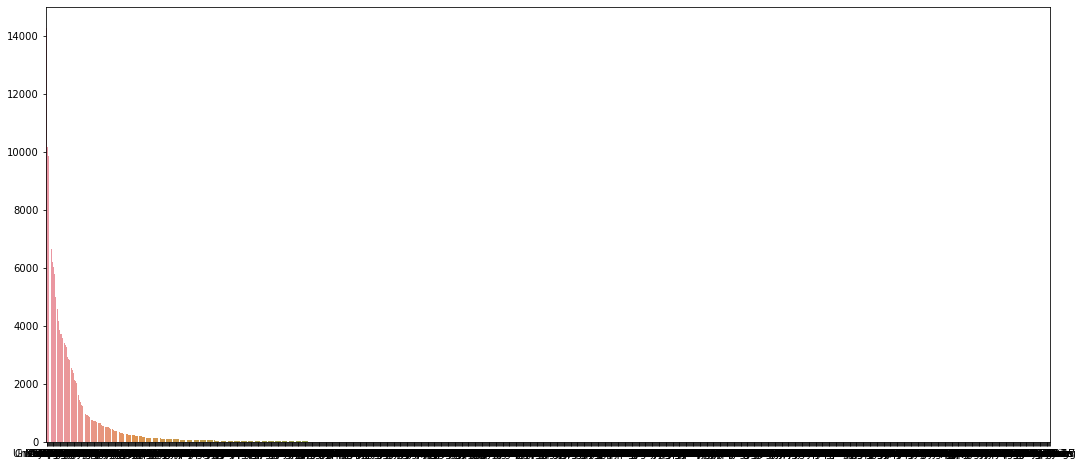

In [30]:
plt.figure(figsize=[18,8])
sns.barplot(x=athlete_count.index, y=athlete_count.values);

Maalesef bu görseli kullanamayız!

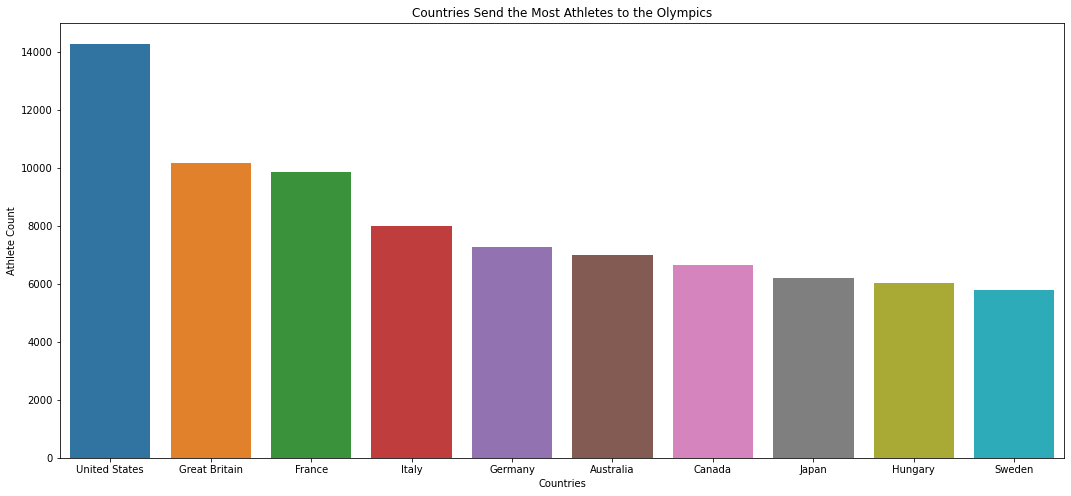

In [31]:
plt.figure(figsize=[18,8])
sns.barplot(x=athlete_count[:10].index, y=athlete_count[:10])
plt.title("Countries Send the Most Athletes to the Olympics")
plt.xlabel("Countries")
plt.ylabel("Athlete Count");

Sporcuların çoğu Amerika Birleşik Devletleri, İngiltere, Fransa, Almanya, İtalya, Japonya, Kanada ve Hollanda gibi birinci dünya ülkelerini temsil etmiştir.

## Hangi ülkeler eve en çok madalyayı götürdü?

In [32]:
df[df.Medal != 'Medal Not Won']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
6,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver,China
10,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,China
25,Bao Yingying,F,24.0,172.0,67.0,China,CHN,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Team",Silver,China
31,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver,China
43,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221883,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Gold,Vietnam
221884,Hong Xun Vinh,M,41.0,175.0,75.0,Vietnam,VIE,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver,Vietnam
221987,Trn Hiu Ngn,F,26.0,157.0,47.0,Vietnam,VIE,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Featherweight,Silver,Vietnam
222124,Paea Wolfgramm,M,26.0,185.0,140.0,Tonga,TGA,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Super-Heavyweight,Silver,Tonga


In [33]:
df_filtered = df[df.Medal != 'Medal Not Won']
medals_by_country = df_filtered.groupby('Team')['Medal'].count().sort_values(ascending=False)
medals_by_country

Team
United States    4686
Soviet Union     2061
Germany          1687
Great Britain    1598
France           1408
                 ... 
Bonaparte           1
Laurea-1            1
Satchmo             1
Nrnberg             1
Sunrise             1
Name: Medal, Length: 479, dtype: int64

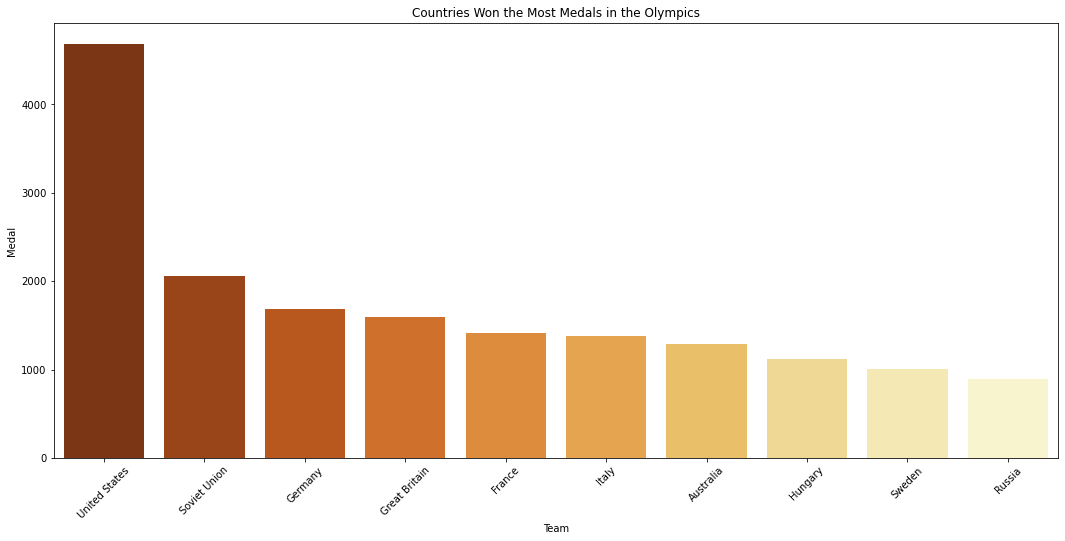

In [34]:
plt.figure(figsize=[18,8])
plt.xticks(rotation=45)
sns.barplot(x=medals_by_country[:10].index, y=medals_by_country[:10], palette="YlOrBr_r")
plt.title("Countries Won the Most Medals in the Olympics");

En çok madalya United States temsil eden takımlar tarafından kazanılmış.

## Ülkeler gönderdikleri sporcu sayılarına göre madalya kazanmakta ne kadar başarılı?

In [35]:
filtered_athlete = athlete_count[athlete_count > 1000]
country_success = (medals_by_country / filtered_athlete).sort_values(ascending=False).dropna()
country_success

Soviet Union      0.449607
East Germany      0.400858
United States     0.328220
Russia            0.253401
Germany           0.231667
China             0.198851
West Germany      0.197017
Norway            0.196714
Yugoslavia        0.188392
Hungary           0.186112
Australia         0.184946
Romania           0.174906
Sweden            0.174259
Netherlands       0.173443
Italy             0.172914
Denmark           0.167430
Cuba              0.165179
Great Britain     0.157144
France            0.142944
South Korea       0.141183
India             0.138686
Japan             0.136488
Finland           0.129683
Brazil            0.121090
Belgium           0.117630
Bulgaria          0.114441
Poland            0.112110
Switzerland       0.104705
New Zealand       0.104128
Canada            0.100663
Belarus           0.099839
Spain             0.099586
Czechoslovakia    0.098706
Ukraine           0.095383
Argentina         0.094059
Turkey            0.080920
South Africa      0.079250
G

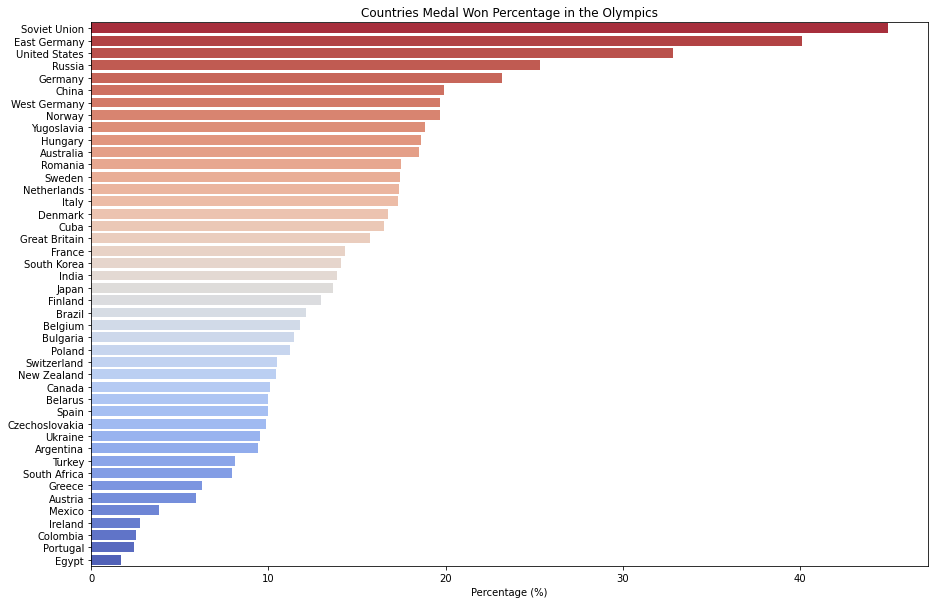

In [36]:
plt.figure(figsize=[15,10])
sns.barplot(x=country_success.values*100, y=country_success.index, palette='coolwarm_r')
plt.title("Countries Medal Won Percentage in the Olympics")
plt.xlabel("Percentage (%)");

## Sporcuların Yaşının Zamana Göre Değişimi.

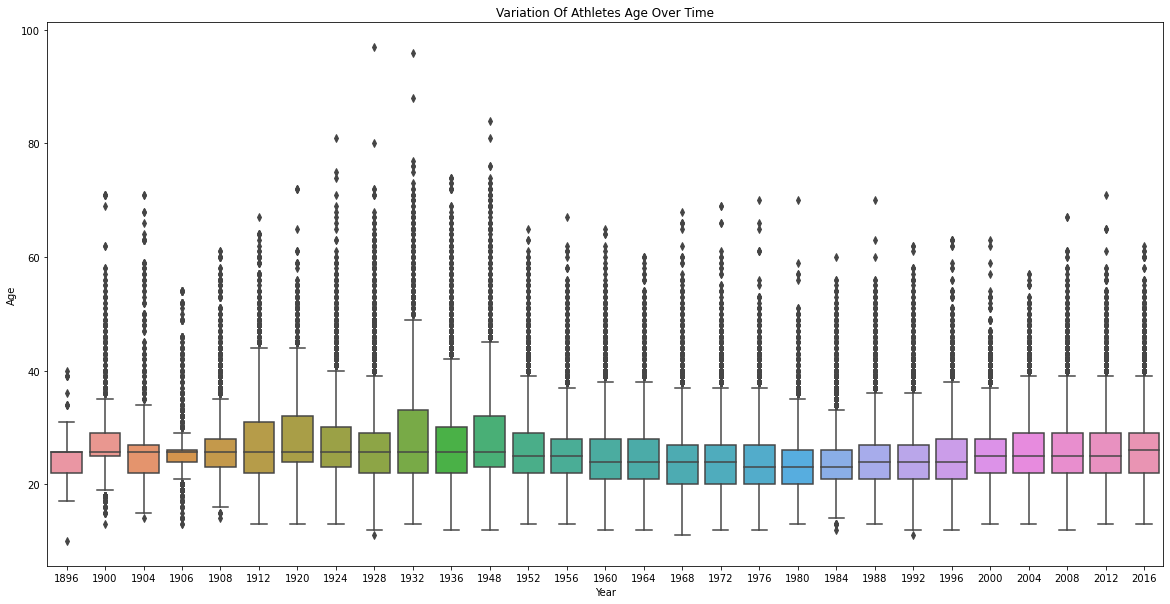

In [37]:
plt.figure(figsize=[20,10])
sns.boxplot(x='Year', y='Age', data = df)
plt.title('Variation Of Athletes Age Over Time');

**Box Plot**, sporcuların medyan yaşının 120 yıllık bir süre boyunca nispeten sabit kaldığını ve **25 - 26 yıl** civarında gezindiğini gösteriyor. Bu eğilim, çoğu insanın 20 ila 30 yaşları arasında atletik zirvede olduğu ve ardından vücutlarında geri dönüşü olmayan değişiklikler yaşamaya başladığı gerçeğiyle bilimsel olarak desteklenmektedir.

## Yıllar içinde zamanla katılımcı sayılarımız nasıl değişmiş?

In [38]:
athlete_by_year = df.groupby('Year')['Name'].count()
athlete_by_year

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5110
1928     4656
1932     2465
1936     6251
1948     6307
1952     8263
1956     5075
1960     8114
1964     7702
1968     8582
1972    10292
1976     8637
1980     7191
1984     9440
1988    12010
1992    12940
1996    13745
2000    13798
2004    13421
2008    13566
2012    12884
2016    13656
Name: Name, dtype: int64

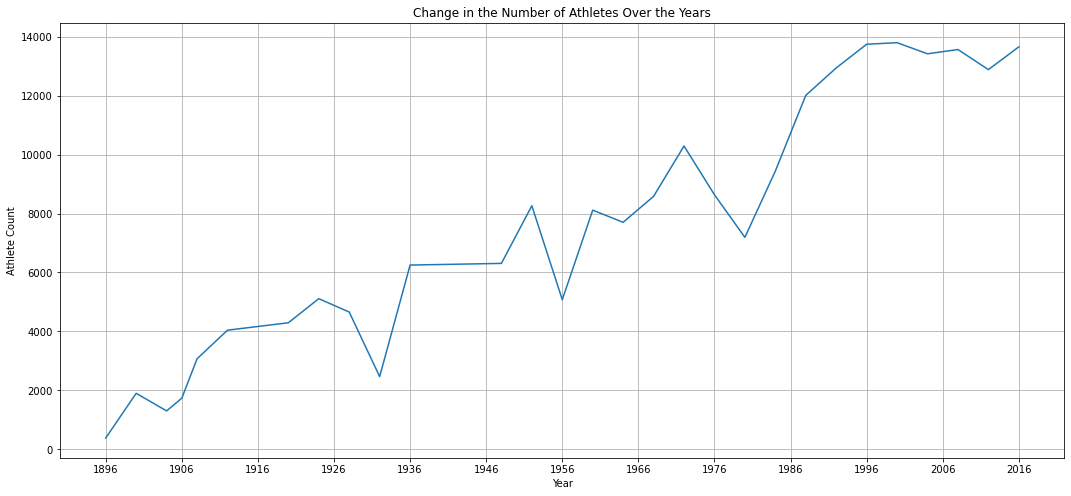

In [39]:
plt.figure(figsize=[18,8])
plt.xticks(np.linspace(1896,2016,13))
plt.grid()
sns.lineplot(x=athlete_by_year.index, y=athlete_by_year.values)
plt.title("Change in the Number of Athletes Over the Years")
plt.ylabel("Athlete Count");

Yıllar geçtikçe, Olimpiyatlardaki yarışmacı sayısı genel olarak giderek artış göstermiş. Ancak, üç durumda (1932, 1956 ve 1980) katılımcı sayısında önemli bir düşüş var.

> **EK BİLGİ:** Bu durumların sebebi 2 kısımda değerlendirilebilir:
* 1932 Olimpiyatları Büyük Buhran sırasında gerçekleştiğinden, çok az ülke yarışmak için takım gönderdi.
* 1956 ve 1980 Olimpiyatlarına katılım, jeopolitik nedenlerle çeşitli ulus gruplarının toptan boykotları nedeniyle oldukça kısıtlandı. (ALAN BİLGİSİ)

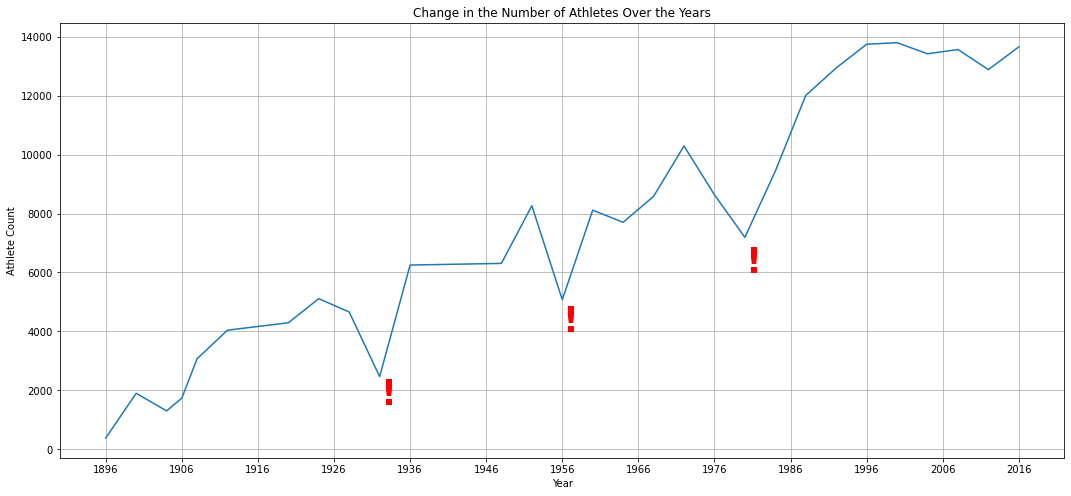

In [40]:
plt.figure(figsize=[18,8])
plt.xticks(np.linspace(1896,2016,13))
plt.grid()
sns.lineplot(x=athlete_by_year.index, y=athlete_by_year.values)
plt.title("Change in the Number of Athletes Over the Years")
plt.ylabel("Athlete Count")
plt.text(x=1932, y=1500, s='!', weight="bold", fontsize=35, color="red")
plt.text(x=1956, y=4000, s='!', weight="bold", fontsize=35, color="red")
plt.text(x=1980, y=6000, s='!', weight="bold", fontsize=35, color="red");